In [2]:
import pandas as pd

df = pd.read_csv('/Users/jessiereddjr./Desktop/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv')

In [3]:
df.shape

(5338, 10)

In [4]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Lil Jessie,2023-06-23 03:39:55,00:00:47,Autoplayed: user action: None;,Black Mirror: Season 5: Smithereens (Episode 2),NaN,FireTV 4K Stick 2018,00:00:56,00:00:56,US (United States)


In [5]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Country'], axis=1)

In [6]:
df.dtypes

Start Time         object
Duration           object
Title              object
Latest Bookmark    object
dtype: object

In [7]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time         datetime64[ns, UTC]
Duration                        object
Title                           object
Latest Bookmark                 object
dtype: object

In [8]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Central')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title,Latest Bookmark
0,2023-06-22 22:39:55-05:00,00:00:47,Black Mirror: Season 5: Smithereens (Episode 2),00:00:56


In [9]:
df ['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time         datetime64[ns, US/Central]
Duration                      timedelta64[ns]
Title                                  object
Latest Bookmark                        object
dtype: object

In [10]:
# create a new dataframe called All American that takes from df
# only the rows in which the Title column contains 'All American'
all_american = df[df['Title'].str.contains('All American', regex=False)]

In [11]:
all_american.shape

(113, 4)

In [15]:
all_american = all_american[(all_american['Duration'] > '0 days 00:01:00')]
all_american.shape

(93, 4)

In [16]:
all_american['Duration'].sum()

Timedelta('1 days 21:03:32')

In [18]:
all_american['weekday'] = all_american['Start Time'].dt.weekday
all_american['hour'] = all_american['Start Time'].dt.hour

# check to make sure colums were added correctly
all_american.head(1)

,Start Time,Duration,Title,Latest Bookmark,weekday,hour
3,2023-06-22 13:19:44-05:00,0 days 00:03:26,All American: Season 1: Back in The Day (Episo...,Not latest view,3,13


In [19]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'All American Episodes Watched by Day'}>

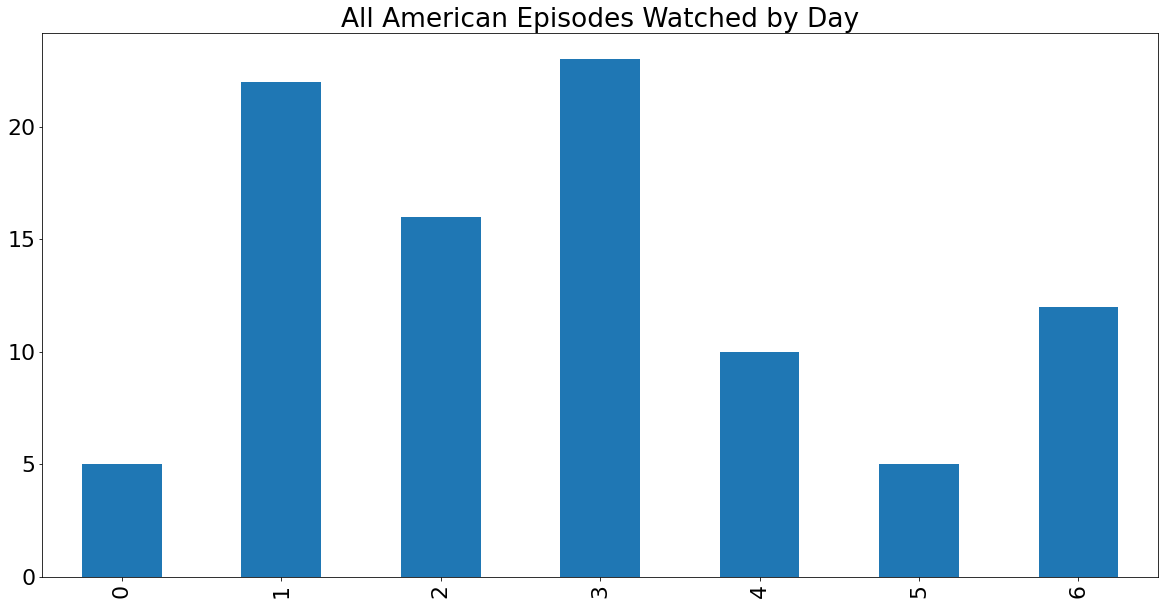

In [22]:
# set our categorical and define the order so the days are plotted Monday-Sunday
all_american['weekday'] = pd.Categorical(all_american['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create all_american_by_day and count the rows for each weekday, assigning the result to that variable
all_american_by_day = all_american['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
all_american_by_day = all_american_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot all_american_by_day as a bar chart with the listed size and title
all_american_by_day.plot(kind='bar', figsize=(20,10), title='All American Episodes Watched by Day')

<AxesSubplot:title={'center':'All American Episodes Watched by Hour'}>

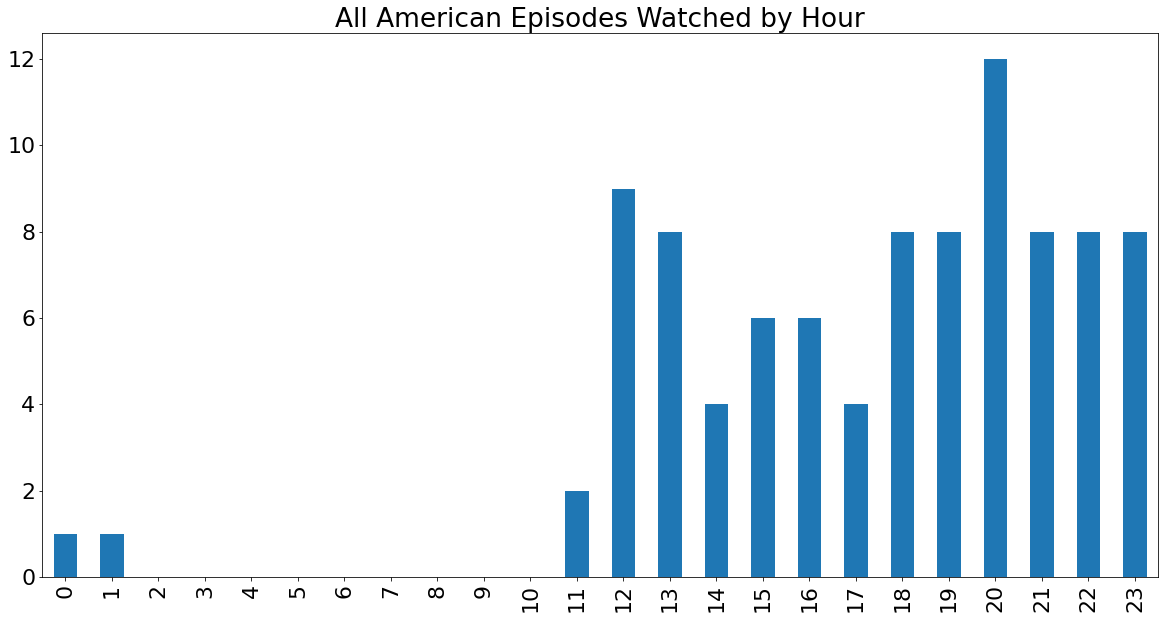

In [24]:
# set our categorical and define the order so the hours are plotted 0-23
all_american['hour'] = pd.Categorical(all_american['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

#create all_american_hour and count the rows for each hour, assigning the result to that variable
all_american_by_hour = all_american['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
all_american_by_hour = all_american_by_hour.sort_index()

# plot all_american_by_hour as a bar chart with the listed size and title
all_american_by_hour.plot(kind='bar', figsize=(20,10), title='All American Episodes Watched by Hour')